In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:


df = pd.read_excel("ny_citibikes_raw.xlsx")
pd.concat([df.head(3), df.tail(3)])

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
20397,2017-03-31 21:13:00,2017-03-31 21:18:00,3195,Sip Ave,3194,McGinley Square,29219,Subscriber,1956,65,65-74,264,4,3,Spring,18,Friday
20398,2017-03-31 21:26:00,2017-03-31 21:30:00,3195,Sip Ave,3201,Dey St,29276,Subscriber,1970,51,45-54,239,4,3,Spring,18,Friday
20399,2017-03-31 23:20:00,2017-03-31 23:30:00,3272,Jersey & 3rd,3268,Lafayette Park,24398,Subscriber,1984,37,35-44,618,10,3,Spring,18,Friday


# 1. Dataset Exploration
  - What information does each column contain?


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20400 non-null  datetime64[ns]
 1   Stop Time             20400 non-null  datetime64[ns]
 2   Start Station ID      20400 non-null  int64         
 3   Start Station Name    20400 non-null  object        
 4   End Station ID        20400 non-null  int64         
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20400 non-null  int64         
 7   User Type             20400 non-null  object        
 8   Birth Year            20400 non-null  int64         
 9   Age                   20400 non-null  int64         
 10  Age Groups            20400 non-null  object        
 11  Trip Duration         20400 non-null  int64         
 12  Trip_Duration_in_min  20400 non-null  int64         
 13  Month           

  - Are there missing or duplicated values?
  

1. Check nulls

In [103]:
missing = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing)

total_missing = df.isnull().sum().sum()
print(f"\nTotal de valores faltantes en todo el DataFrame: {total_missing}")


Valores faltantes por columna:
Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

Total de valores faltantes en todo el DataFrame: 1


In [104]:
#En pandas cuando pones un Series booleando dentro de un df[], te devuelve las filas donde el Series es True
nulo = df[df["End Station Name"].isnull()]
nulo

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
9858,2017-02-25 12:36:00,2017-02-25 12:44:00,3220,5 Corners Library,3211,NaN,24522,Subscriber,1963,58,55-64,532,9,2,Winter,11,Saturday


In [105]:
df.dropna(inplace=True)

2. Check duplicated

In [106]:
duplicated = df.duplicated()
count_duplicated = duplicated[duplicated == True].count()
print("Total de valores duplicados:",count_duplicated)

Total de valores duplicados: 3555


In [107]:
df.drop_duplicates(inplace=True)

- What is the overall time span of the trips?

In [108]:
start = df["Start Time"].min()
end = df["Stop Time"].max()
total_duration = end - start
dias = total_duration.days
horas = total_duration.seconds // 3600
minutos = (total_duration.seconds % 3600) // 60
segundos = total_duration.seconds % 60
total_duration = f"{dias} días, {horas} horas, {minutos} minutos, {segundos} segundos"
print(f"Duración total del conjunto de datos: {total_duration}")
print(f"Se han recogido datos desde {start} hasta {end}")

Duración total del conjunto de datos: 89 días, 22 horas, 52 minutos, 0 segundos
Se han recogido datos desde 2017-01-01 00:38:00 hasta 2017-03-31 23:30:00


# 2. Basic Statistics
  - What is the average trip duration (in minutes)?

In [109]:
trip_min_mean = df["Trip_Duration_in_min"].mean().round(2)
print(f"La duración media de los viajes en el primer trimestre de 2017 ha sido de: {trip_min_mean} minutos")

La duración media de los viajes en el primer trimestre de 2017 ha sido de: 9.58 minutos


- What is the minimum and maximum duration?

In [110]:
viaje_mas_corto = df["Trip Duration"].min()
print(f"El viaje más corto tuvo una duración de {viaje_mas_corto} segundos")
viaje_mas_largo = df["Trip_Duration_in_min"].max()
print(f"El viaje más largo tuvo una duración de {viaje_mas_largo} minutos")




El viaje más corto tuvo una duración de 61 segundos
El viaje más largo tuvo una duración de 6515 minutos




  
  - What are the most common start and end stations?


In [111]:
estacion_inicio_mas_utilizada = df["Start Station Name"].mode()[0]
print(f"La estación de inicio más utilizada es: {estacion_inicio_mas_utilizada}")
estacion_fin_mas_utilizada = df["End Station Name"].mode()[0]
print(f"La estación de fin más utilizada es: {estacion_fin_mas_utilizada}")

print("\n- Top 5 estaciones de inicio:")
print(df['Start Station Name'].value_counts().head(5))
print("\n- Top 5 estaciones de fin:")
print(df['End Station Name'].value_counts().head(5))


La estación de inicio más utilizada es: Grove St PATH
La estación de fin más utilizada es: Grove St PATH

- Top 5 estaciones de inicio:
Start Station Name
Grove St PATH     2115
Exchange Place    1225
Sip Ave           1084
Hamilton Park     1069
Morris Canal       710
Name: count, dtype: int64

- Top 5 estaciones de fin:
End Station Name
Grove St PATH     2743
Exchange Place    1254
Sip Ave            955
Hamilton Park      949
Newport PATH       683
Name: count, dtype: int64


# 3. Users and Demographics
  - How many unique bikes were used?
  

In [112]:
bicis_unicas = df["Bike ID"].nunique()
print(f"Número de bicicletas únicas utilizadas: {bicis_unicas}")

Número de bicicletas únicas utilizadas: 500


- What are the proportions of user types (Subscriber vs Customer)?


In [113]:
tipos_usuarios = df["User Type"].value_counts(normalize=True) * 100
print("Proporciones de tipos de usuarios:")
print(tipos_usuarios.round(2))

Proporciones de tipos de usuarios:
User Type
Subscriber       98.11
One-time user     1.89
Name: proportion, dtype: float64


- What is the age distribution of the users? Which age group uses the service the most?

In [114]:
distribucion_edad = df['Age Groups'].value_counts().sort_index()
grupo_mas_frecuente = distribucion_edad.idxmax()
print("\nDistribución de edades de los usuarios:")
print(distribucion_edad)
print(f"\nEl grupo de edad que más utiliza el servicio es: {grupo_mas_frecuente} con {distribucion_edad.max()} usuarios.")


Distribución de edades de los usuarios:
Age Groups
18-24      54
25-34    4002
35-44    7698
45-54    2973
55-64    1447
65-74     615
75+        55
Name: count, dtype: int64

El grupo de edad que más utiliza el servicio es: 35-44 con 7698 usuarios.


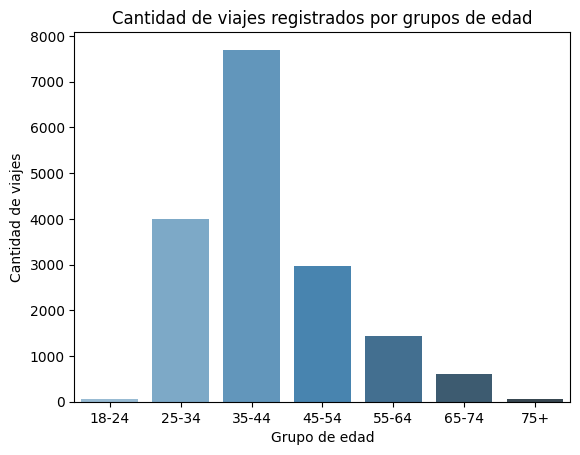

In [129]:
sns.barplot(x=distribucion_edad.index, y=distribucion_edad.values, hue=distribucion_edad.index, palette="Blues_d")
plt.title("Cantidad de viajes registrados por grupos de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de viajes")
plt.show()

# 4. Temporal Analysis
  - How does the number of trips vary by weekday?
  - Which month or season has the most rides?
  - What time of day do most trips start?


# 5. Geographic Analysis
  - Which station pairs (start → end) appear most often?
  - Are there any stations that appear only as start or only as end stations?


# 6. Temperature and Duration
  - Is there any visible relationship between temperature and trip duration?

  - How does average trip duration vary by season?


# 7. Summary and Interpretation
  - Write a short summary (5–10 lines) of your findings.
  - Mention patterns, anomalies, or interesting trends you observed.
